In [15]:
!pip install pandas
!pip install seaborn
!pip install scikit-learn

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Read and prepare the data
df = pd.read_csv('data\EV Cars.csv')
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Basic data exploration
print("Dataset Shape:", df.shape)
print("\nBasic Statistics:")
print(df.describe())

# Create price segments
df['Price_Segment'] = pd.cut(df['PriceEuro'], 
                            bins=[0, 35000, 60000, 100000, float('inf')],
                            labels=['Budget', 'Mid-range', 'Premium', 'Luxury'])

Dataset Shape: (103, 15)

Basic Statistics:
       Unnamed: 0    AccelSec  TopSpeed_KmH    Range_Km  Efficiency_WhKm  \
count  103.000000  103.000000    103.000000  103.000000       103.000000   
mean    51.000000    7.396117    179.194175  338.786408       189.165049   
std     29.877528    3.017430     43.573030  126.014444        29.566839   
min      0.000000    2.100000    123.000000   95.000000       104.000000   
25%     25.500000    5.100000    150.000000  250.000000       168.000000   
50%     51.000000    7.300000    160.000000  340.000000       180.000000   
75%     76.500000    9.000000    200.000000  400.000000       203.000000   
max    102.000000   22.400000    410.000000  970.000000       273.000000   

       FastCharge_KmH       Seats      PriceEuro  
count      103.000000  103.000000     103.000000  
mean       444.271845    4.883495   55811.563107  
std        203.949253    0.795834   34134.665280  
min        170.000000    2.000000   20129.000000  
25%        260.0

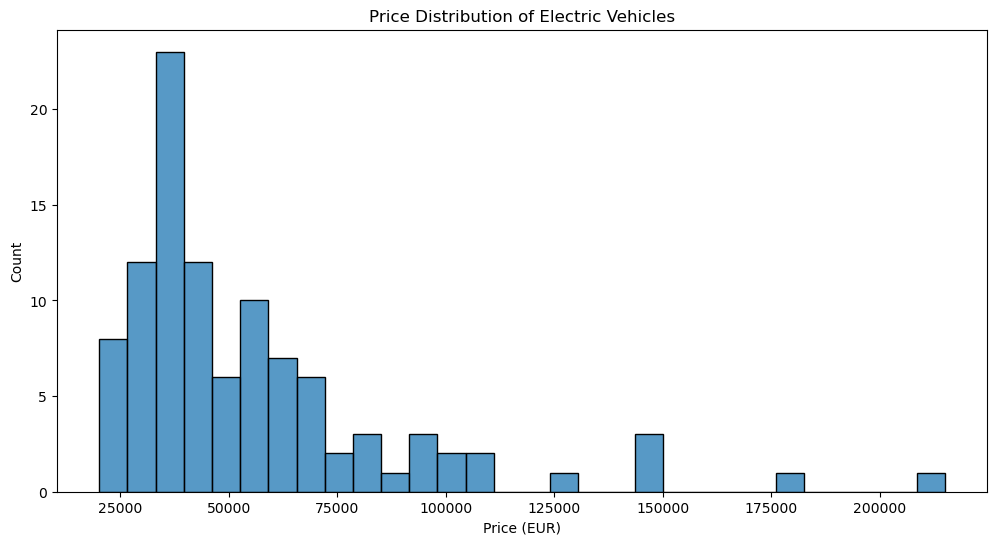

In [18]:
# 1. Price Distribution Analysis
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='PriceEuro', bins=30)
plt.title('Price Distribution of Electric Vehicles')
plt.xlabel('Price (EUR)')
plt.ylabel('Count')
plt.show()

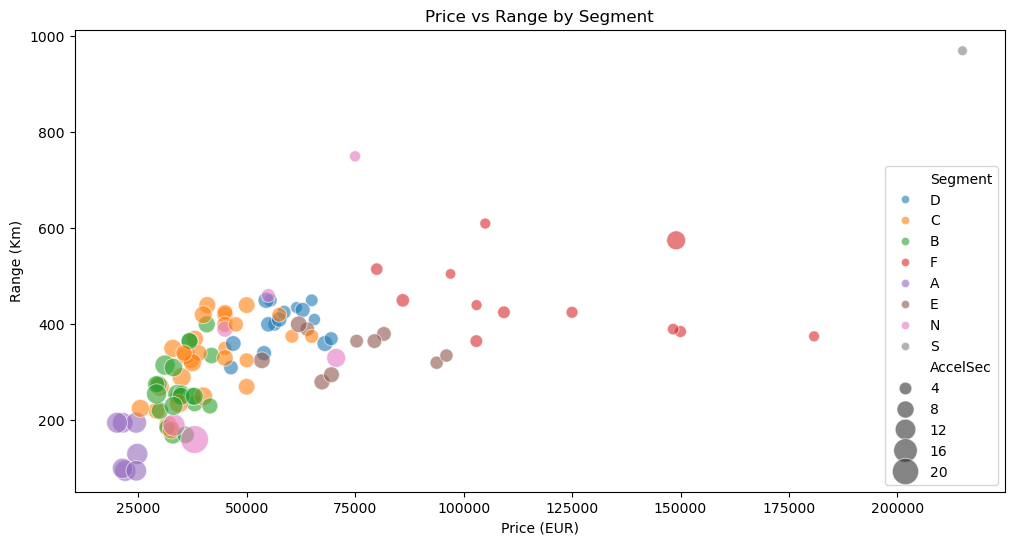

In [19]:
# 2. Price vs Range Analysis
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='PriceEuro', y='Range_Km', hue='Segment', size='AccelSec',
                sizes=(50, 400), alpha=0.6)
plt.title('Price vs Range by Segment')
plt.xlabel('Price (EUR)')
plt.ylabel('Range (Km)')
plt.show()

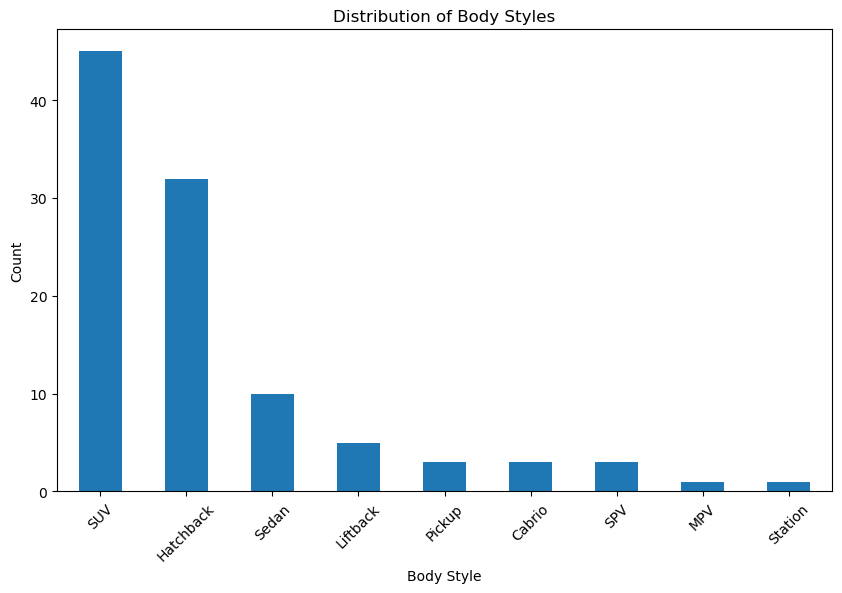

In [20]:
# 3. Body Style Distribution
plt.figure(figsize=(10, 6))
df['BodyStyle'].value_counts().plot(kind='bar')
plt.title('Distribution of Body Styles')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

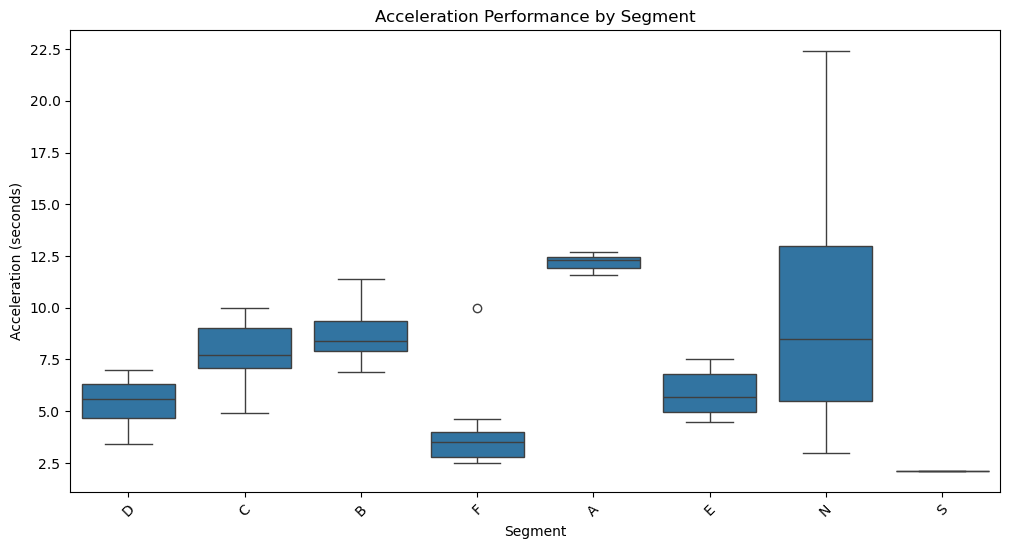

In [21]:
# 4. Performance Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Segment', y='AccelSec')
plt.title('Acceleration Performance by Segment')
plt.xlabel('Segment')
plt.ylabel('Acceleration (seconds)')
plt.xticks(rotation=45)
plt.show()

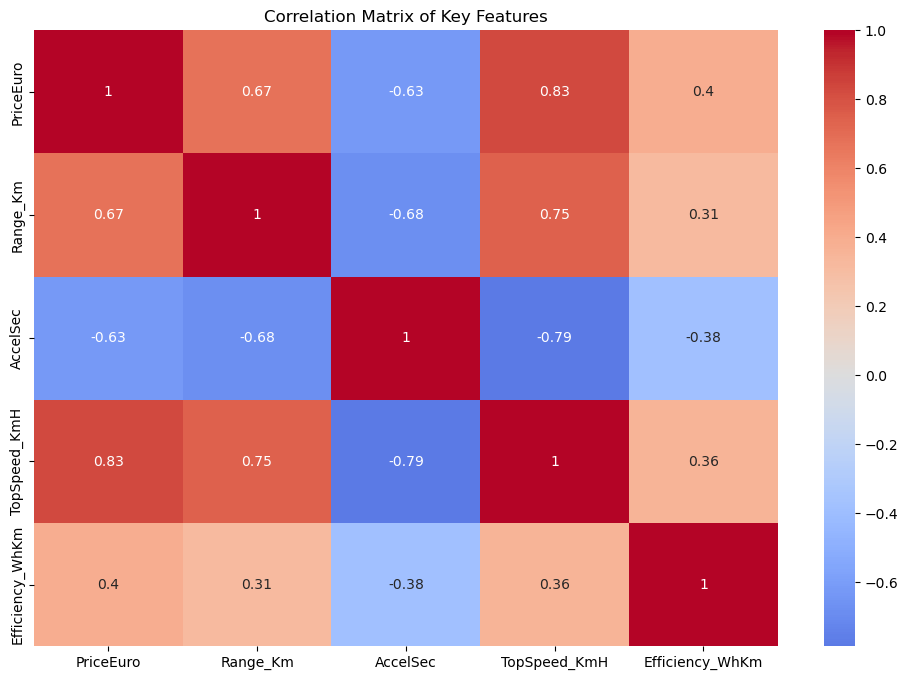

In [22]:
# 5. Feature Relationships
plt.figure(figsize=(12, 8))
correlation_matrix = df[['PriceEuro', 'Range_Km', 'AccelSec', 'TopSpeed_KmH', 'Efficiency_WhKm']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Key Features')
plt.show()

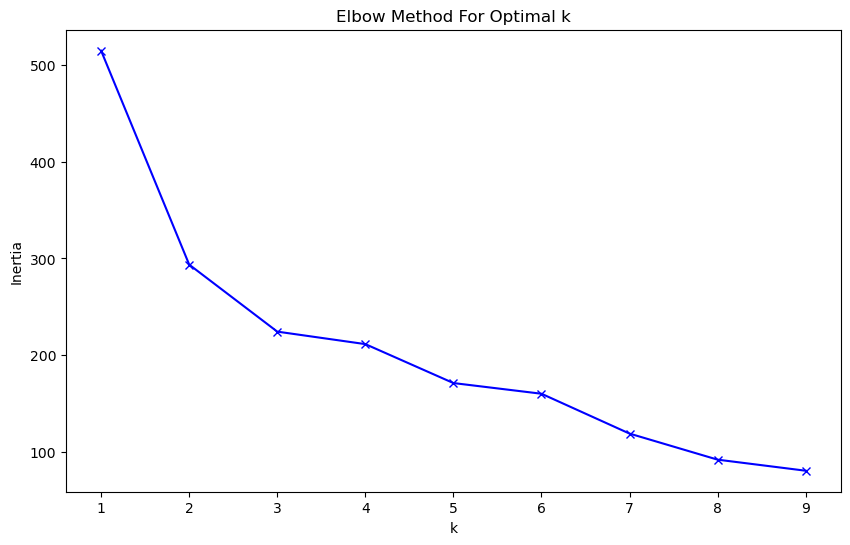

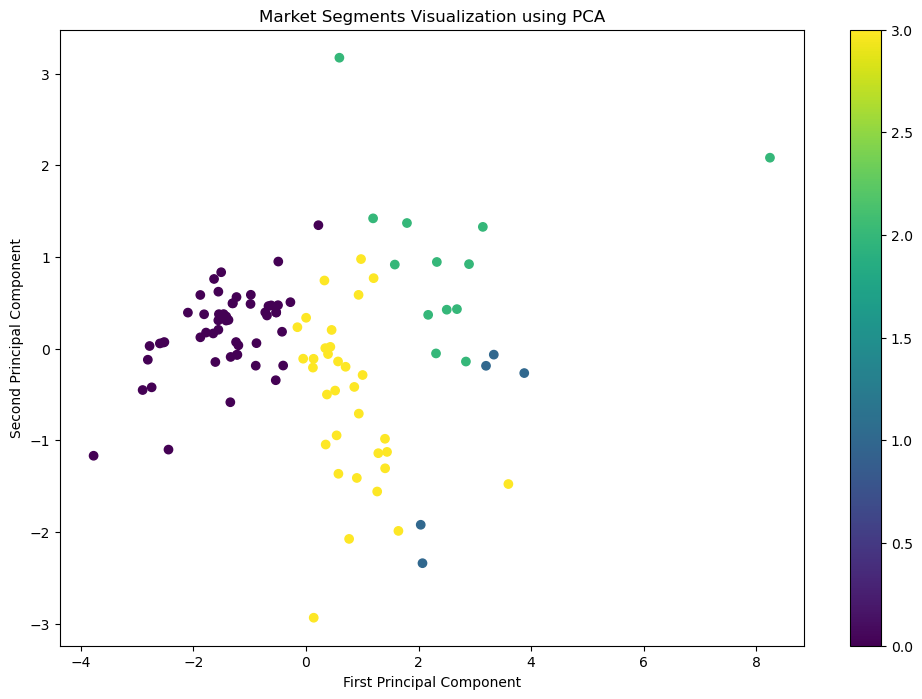

In [23]:
# 6. Market Segmentation using K-means clustering
# Prepare data for clustering
features_for_clustering = ['PriceEuro', 'Range_Km', 'AccelSec', 'TopSpeed_KmH', 'Efficiency_WhKm']
X = df[features_for_clustering]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using elbow method
inertias = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Perform clustering with optimal k (let's use k=4 for this example)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Market Segments Visualization using PCA')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter)
plt.show()

In [24]:
# 7. Segment Analysis
print("\nCluster Characteristics:")
print(df.groupby('Cluster')[features_for_clustering].mean())


Cluster Characteristics:
             PriceEuro    Range_Km  AccelSec  TopSpeed_KmH  Efficiency_WhKm
Cluster                                                                    
0         33992.326923  258.846154  9.440385    150.653846       171.461538
1        133786.400000  361.000000  3.700000    238.000000       236.600000
2        104214.384615  505.769231  3.984615    253.538462       183.307692
3         59311.242424  395.606061  6.078788    185.969697       212.181818


In [25]:
# 8. Top Models in Each Segment
print("\nRepresentative Models in Each Cluster:")
for cluster in df['Cluster'].unique():
    print(f"\nCluster {cluster}:")
    print(df[df['Cluster'] == cluster][['Brand', 'Model', 'PriceEuro', 'Range_Km']].head())


Representative Models in Each Cluster:

Cluster 2:
     Brand                           Model  PriceEuro  Range_Km
0   Tesla    Model 3 Long Range Dual Motor      55480       450
5   Lucid                             Air      105000       610
23   Audi                       e-tron GT      125000       425
24  Tesla   Model 3 Long Range Performance      61480       435
40  Tesla               Model S Long Range      79990       515

Cluster 0:
         Brand                        Model  PriceEuro  Range_Km
1  Volkswagen                     ID.3 Pure      30000       270
4       Honda                            e       32997       170
6  Volkswagen                       e-Golf       31900       190
7     Peugeot                        e-208       29682       275
8       Tesla   Model 3 Standard Range Plus      46380       310

Cluster 3:
        Brand           Model  PriceEuro  Range_Km
2   Polestar                2      56440       400
3        BMW             iX3       68040       3

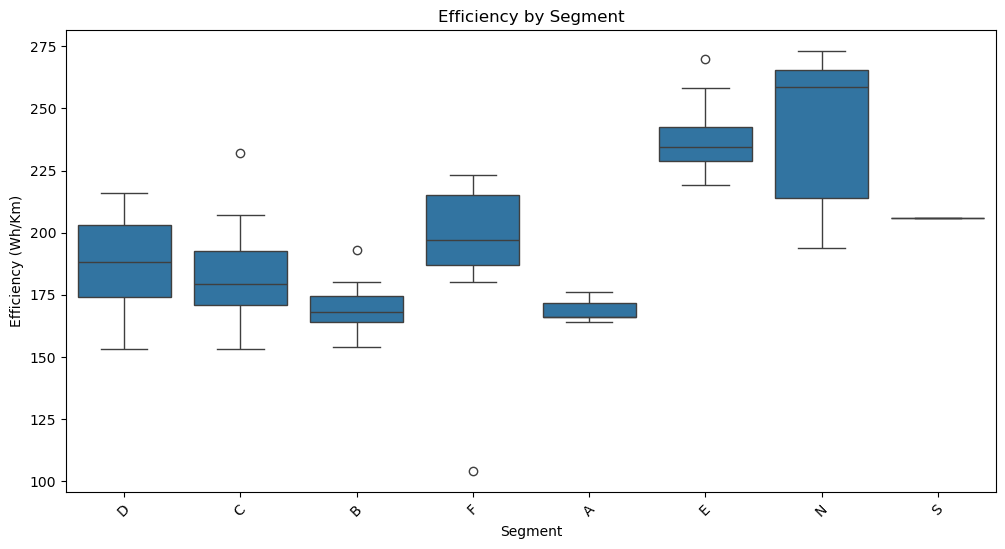

In [26]:
# 9. Efficiency Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Segment', y='Efficiency_WhKm')
plt.title('Efficiency by Segment')
plt.xlabel('Segment')
plt.ylabel('Efficiency (Wh/Km)')
plt.xticks(rotation=45)
plt.show()

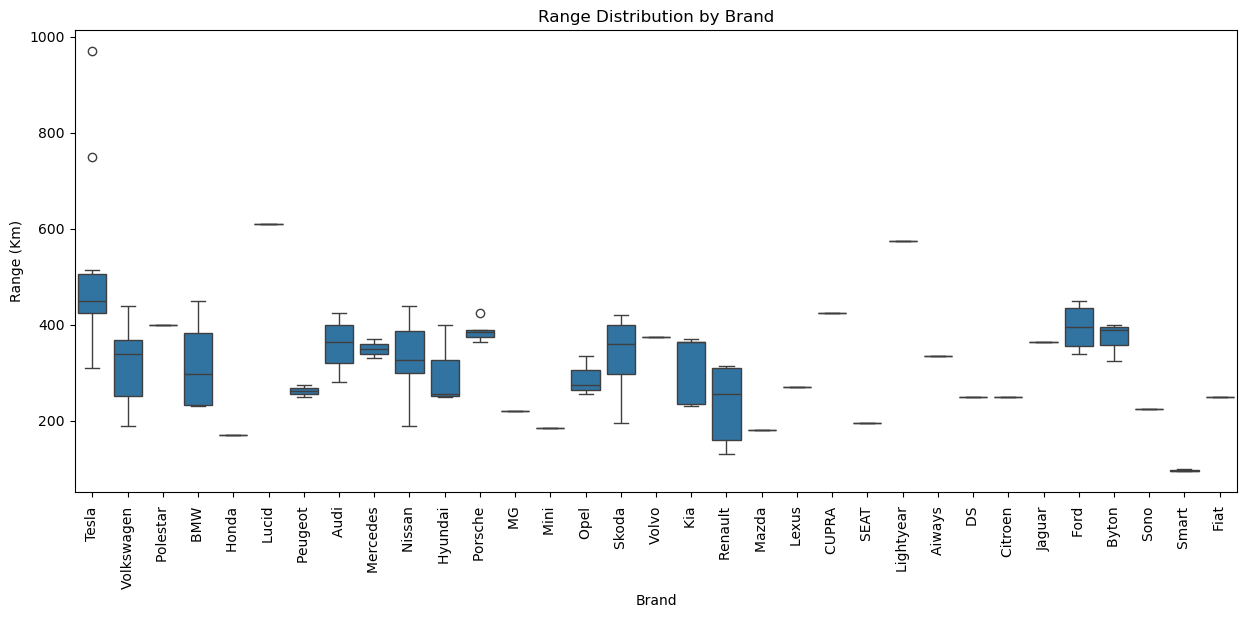

In [27]:
# 10. Range Distribution by Brand
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='Brand', y='Range_Km')
plt.title('Range Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Range (Km)')
plt.xticks(rotation=90)
plt.show()

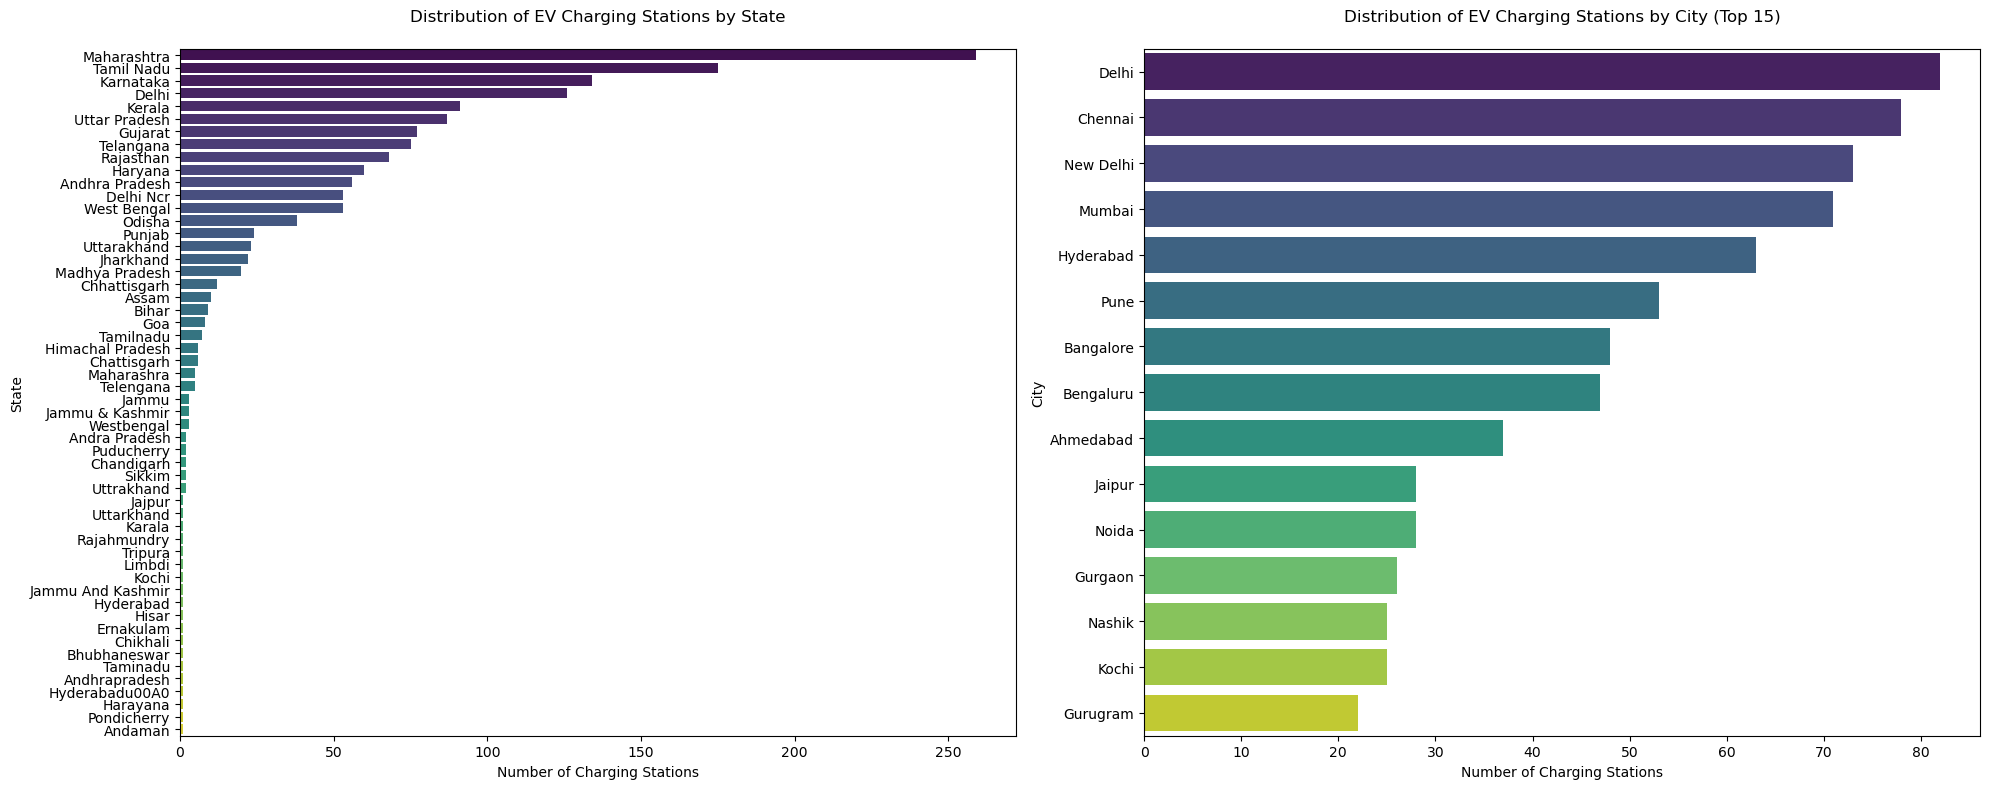


State-wise Station Count:
state
Maharashtra          259
Tamil Nadu           175
Karnataka            134
Delhi                126
Kerala                91
Uttar Pradesh         87
Gujarat               77
Telangana             75
Rajasthan             68
Haryana               60
Andhra Pradesh        56
Delhi Ncr             53
West Bengal           53
Odisha                38
Punjab                24
Uttarakhand           23
Jharkhand             22
Madhya Pradesh        20
Chhattisgarh          12
Assam                 10
Bihar                  9
Goa                    8
Tamilnadu              7
Himachal Pradesh       6
Chattisgarh            6
Maharashra             5
Telengana              5
Jammu                  3
Jammu & Kashmir        3
Westbengal             3
Andra Pradesh          2
Puducherry             2
Chandigarh             2
Sikkim                 2
Uttrakhand             2
Jajpur                 1
Uttarkhand             1
Karala                 1
Rajahmundry      

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def plot_station_distribution(csv_path):
    """
    Create bar graphs for state-wise and city-wise distribution of charging stations
    """
    # Read the data
    df = pd.read_csv(csv_path)
    
    # Clean state and city names
    df['state'] = df['state'].str.strip().str.title()
    df['city'] = df['city'].str.strip().str.title()
    
    # Get counts for states and cities
    state_counts = df['state'].value_counts()
    city_counts = df['city'].value_counts()
    
    # Create figure with two subplots side by side
    plt.figure(figsize=(20, 8))
    
    # Plot state-wise distribution
    plt.subplot(1, 2, 1)
    sns.barplot(x=state_counts.values, y=state_counts.index, palette='viridis')
    plt.title('Distribution of EV Charging Stations by State', pad=20)
    plt.xlabel('Number of Charging Stations')
    plt.ylabel('State')
    
    # Plot city-wise distribution (top 15 cities)
    plt.subplot(1, 2, 2)
    sns.barplot(x=city_counts.head(15).values, y=city_counts.head(15).index, palette='viridis')
    plt.title('Distribution of EV Charging Stations by City (Top 15)', pad=20)
    plt.xlabel('Number of Charging Stations')
    plt.ylabel('City')
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()
    
    # Print the counts for verification
    print("\nState-wise Station Count:")
    print(state_counts)
    
    print("\nTop 15 Cities by Station Count:")
    print(city_counts.head(15))

# Usage
if __name__ == "__main__":
    csv_path = 'data\EV Charging Stations India.csv'
    plot_station_distribution(csv_path)

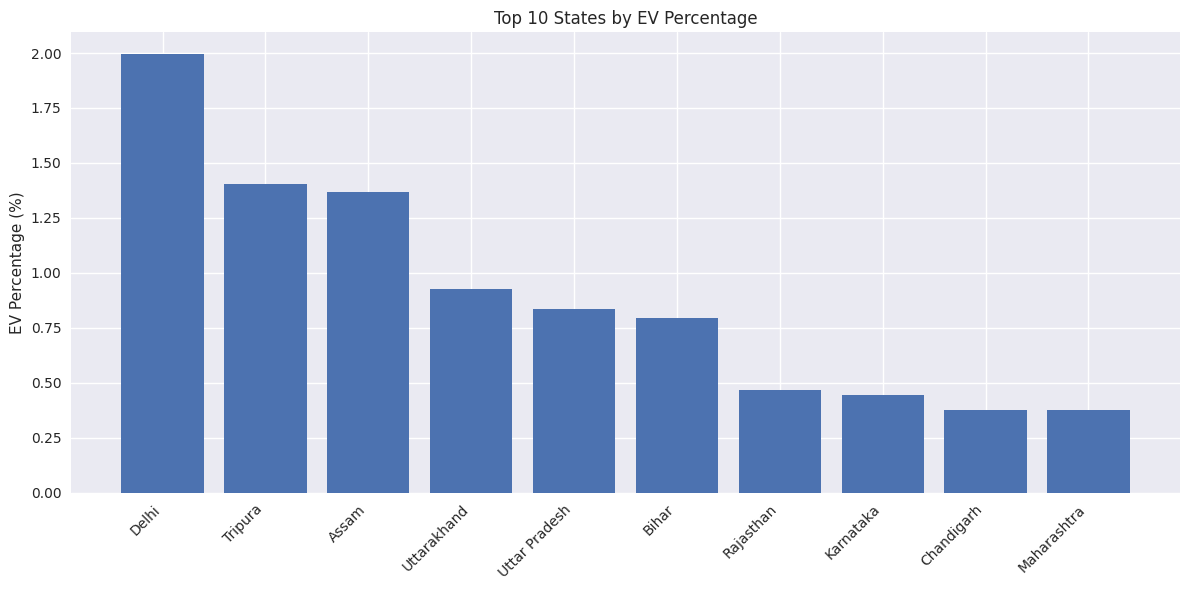

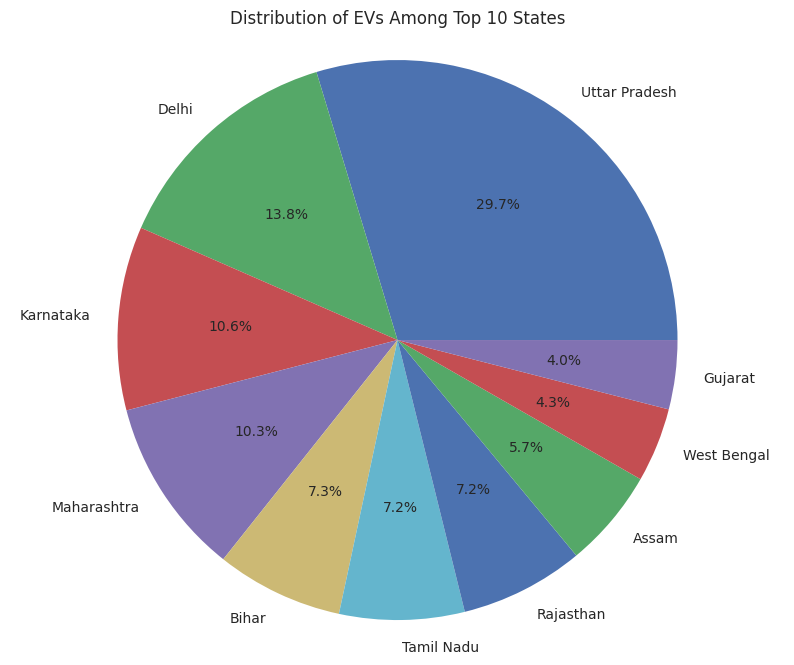

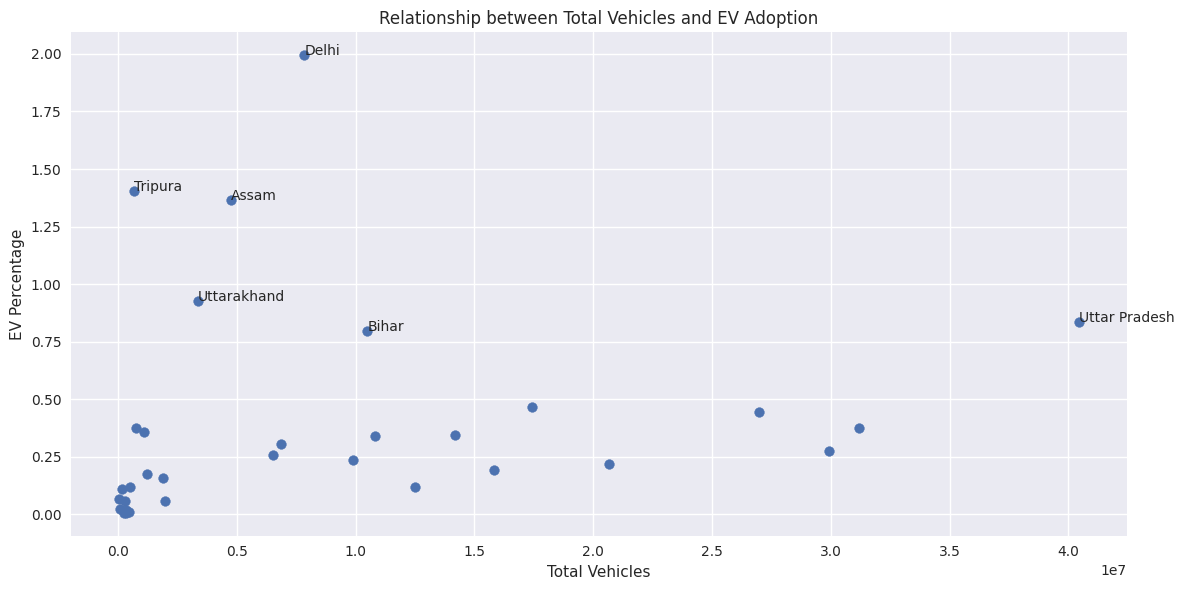


Top 10 States by EV Percentage:
       State Name  EV Percentage  Total Electric Vehicle
7           Delhi       1.994302                156393.0
31        Tripura       1.404849                  9262.0
3           Assam       1.365847                 64766.0
33    Uttarakhand       0.927537                 31008.0
34  Uttar Pradesh       0.833991                337180.0
4           Bihar       0.794392                 83335.0
27      Rajasthan       0.467225                 81338.0
14      Karnataka       0.446566                120532.0
5      Chandigarh       0.375087                  2812.0
19    Maharashtra       0.374158                116646.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read and clean the data
def clean_data(df):
    # Remove rows with NaN values
    df = df.dropna()
    
    # Convert columns to numeric, removing commas and converting to float
    df['Total Electric Vehicle'] = df['Total Electric Vehicle'].str.replace(',', '').astype(float)
    df['Total Non-Electric Vehicle'] = df['Total Non-Electric Vehicle'].str.replace(',', '').astype(float)
    df['Total'] = df['Total'].str.replace(',', '').astype(float)
    
    # Calculate percentage of electric vehicles
    df['EV Percentage'] = (df['Total Electric Vehicle'] / df['Total']) * 100
    
    return df

# Create visualizations
def create_visualizations(df):
    # Set style
    plt.style.use('seaborn')
    
    # 1. Top 10 states by EV percentage
    plt.figure(figsize=(12, 6))
    top_10_ev_pct = df.nlargest(10, 'EV Percentage')
    plt.bar(top_10_ev_pct['State Name'], top_10_ev_pct['EV Percentage'])
    plt.xticks(rotation=45, ha='right')
    plt.title('Top 10 States by EV Percentage')
    plt.ylabel('EV Percentage (%)')
    plt.tight_layout()
    plt.show()
    
    # 2. Pie chart of top 10 states by total EVs
    plt.figure(figsize=(10, 8))
    top_10_ev = df.nlargest(10, 'Total Electric Vehicle')
    plt.pie(top_10_ev['Total Electric Vehicle'], 
            labels=top_10_ev['State Name'],
            autopct='%1.1f%%')
    plt.title('Distribution of EVs Among Top 10 States')
    plt.axis('equal')
    plt.show()
    
    # 3. Scatter plot: Total vehicles vs EV percentage
    plt.figure(figsize=(12, 6))
    plt.scatter(df['Total'], df['EV Percentage'])
    plt.xlabel('Total Vehicles')
    plt.ylabel('EV Percentage')
    plt.title('Relationship between Total Vehicles and EV Adoption')
    for i, txt in enumerate(df['State Name']):
        if df['EV Percentage'].iloc[i] > 0.5:  # Label only states with >0.5% EVs
            plt.annotate(txt, (df['Total'].iloc[i], df['EV Percentage'].iloc[i]))
    plt.tight_layout()
    plt.show()

# Analyze the data
def analyze_data(df):
    # Calculate key statistics
    stats = {
        'Total EVs in India': df['Total Electric Vehicle'].sum(),
        'Average EV Percentage': df['EV Percentage'].mean(),
        'Median EV Percentage': df['EV Percentage'].median(),
        'State with Highest EV %': df.loc[df['EV Percentage'].idxmax(), 'State Name'],
        'Highest EV %': df['EV Percentage'].max(),
        'State with Most EVs': df.loc[df['Total Electric Vehicle'].idxmax(), 'State Name'],
        'Most EVs': df['Total Electric Vehicle'].max()
    }
    return stats

# Main analysis
def main():
    # Read the data
    df = pd.read_csv('data\Electric Vehicle In India 2022.csv')
    
    # Clean the data
    df_cleaned = clean_data(df)
    
    # Create visualizations
    create_visualizations(df_cleaned)
    
    # Get statistics
    stats = analyze_data(df_cleaned)
    
    
    # Display top 10 states by EV percentage
    print("\nTop 10 States by EV Percentage:")
    print(df_cleaned.nlargest(10, 'EV Percentage')[['State Name', 'EV Percentage', 'Total Electric Vehicle']])

if __name__ == "__main__":
    main()


Analyzing 2WN:
--------------------------------------------------
Number of states with 2WN: 34
Maximum value: 149,977 (Maharashtra)
Minimum value: 1 (Sikkim)
Average value: 23,640


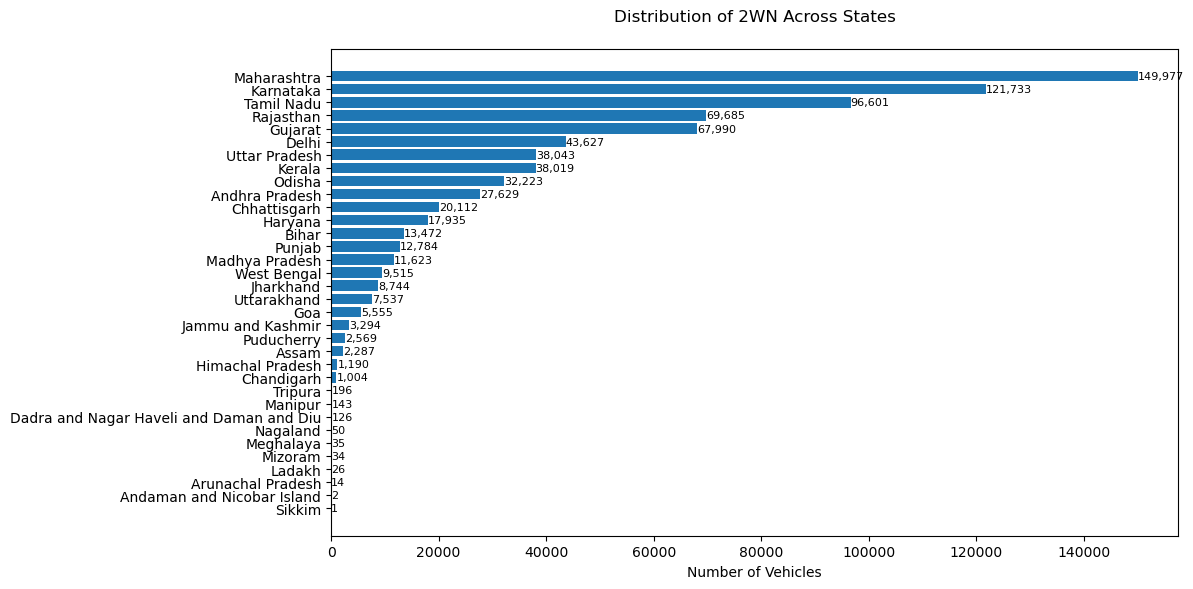


Analyzing 2WT:
--------------------------------------------------
Number of states with 2WT: 10
Maximum value: 9,395 (Karnataka)
Minimum value: 1 (Goa)
Average value: 959


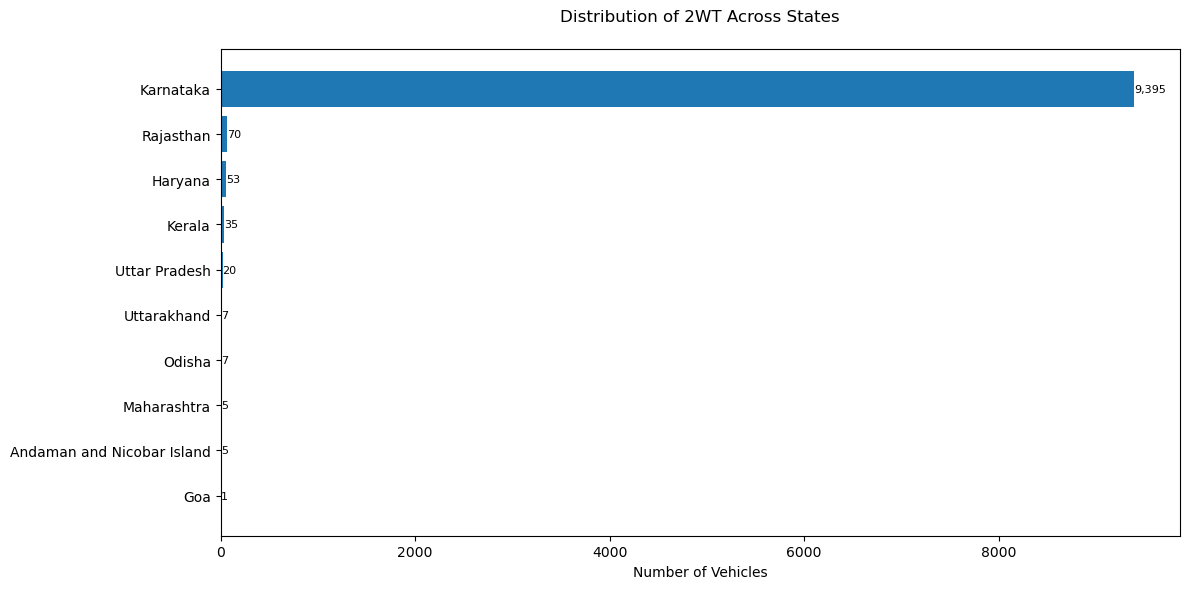


Analyzing 2WIC:
--------------------------------------------------
Number of states with 2WIC: 10
Maximum value: 32 (Kerala)
Minimum value: 1 (Odisha)
Average value: 5


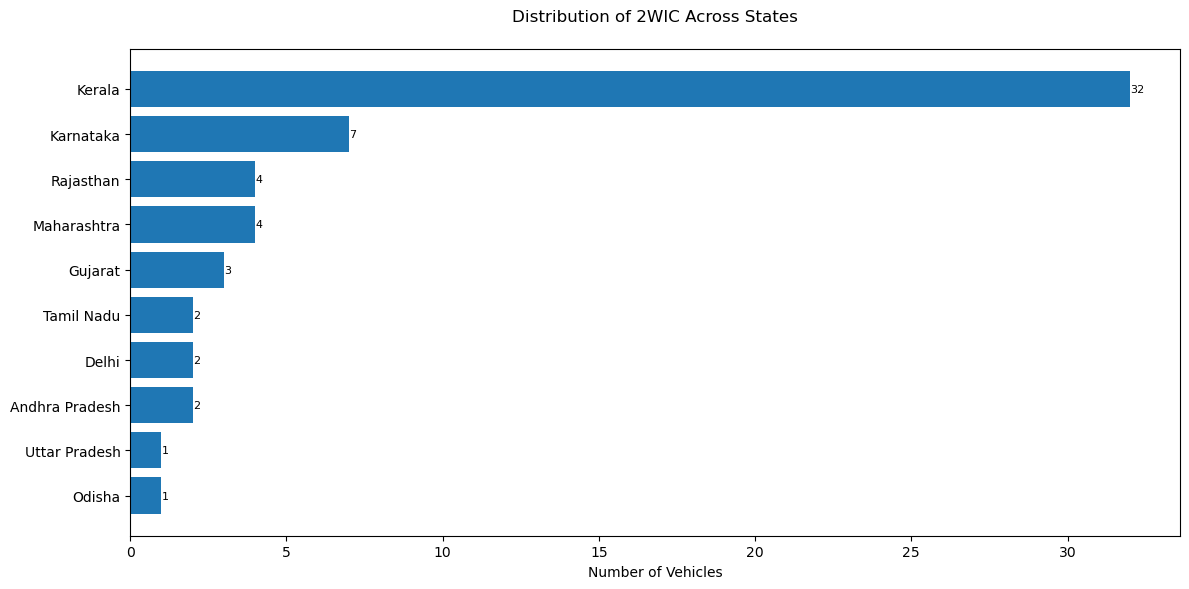


Analyzing 3WN:
--------------------------------------------------
Number of states with 3WN: 15
Maximum value: 374 (Andhra Pradesh)
Minimum value: 1 (Himachal Pradesh)
Average value: 49


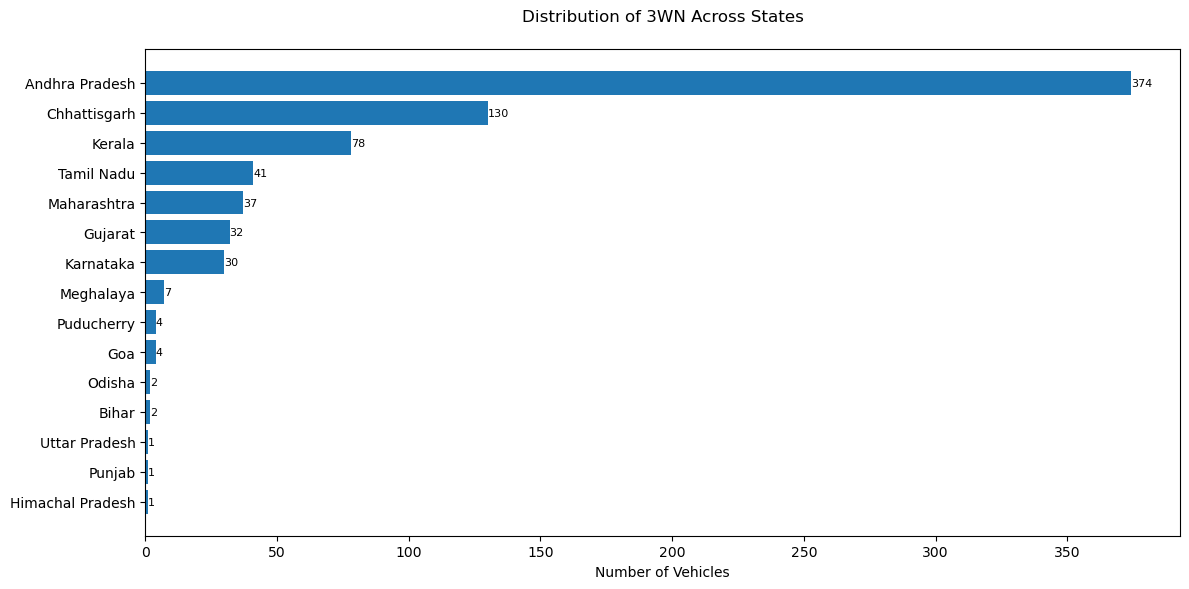


Analyzing 3WT:
--------------------------------------------------
Number of states with 3WT: 29
Maximum value: 375,595 (Uttar Pradesh)
Minimum value: 1 (Mizoram)
Average value: 31,664


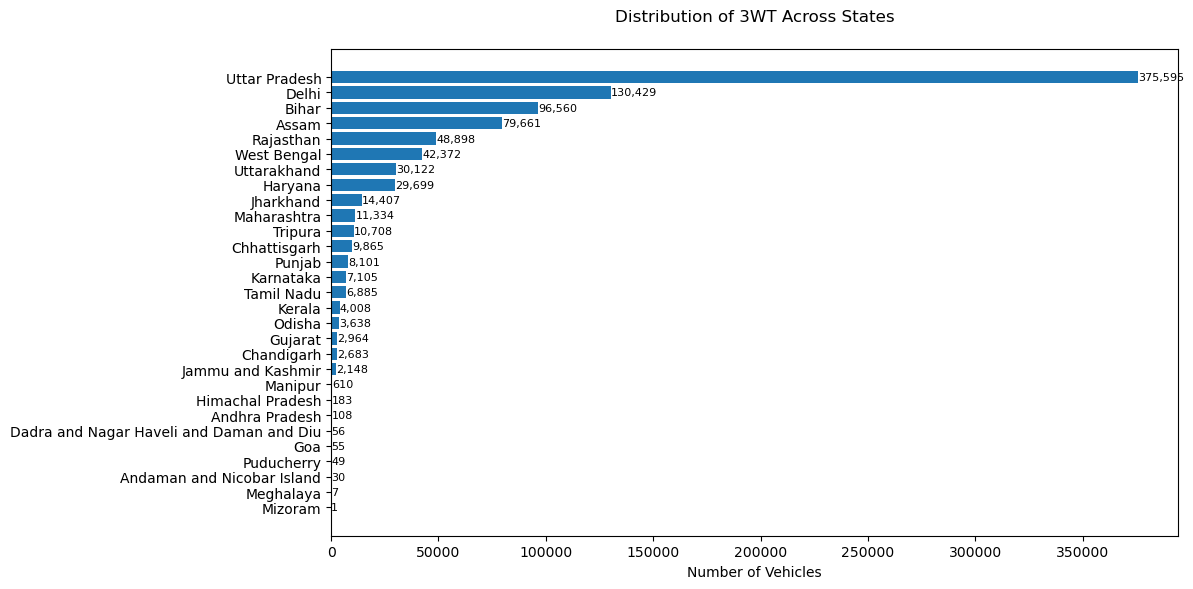


Analyzing LMV:
--------------------------------------------------
Number of states with LMV: 34
Maximum value: 15,583 (Maharashtra)
Minimum value: 3 (Mizoram)
Average value: 1,580


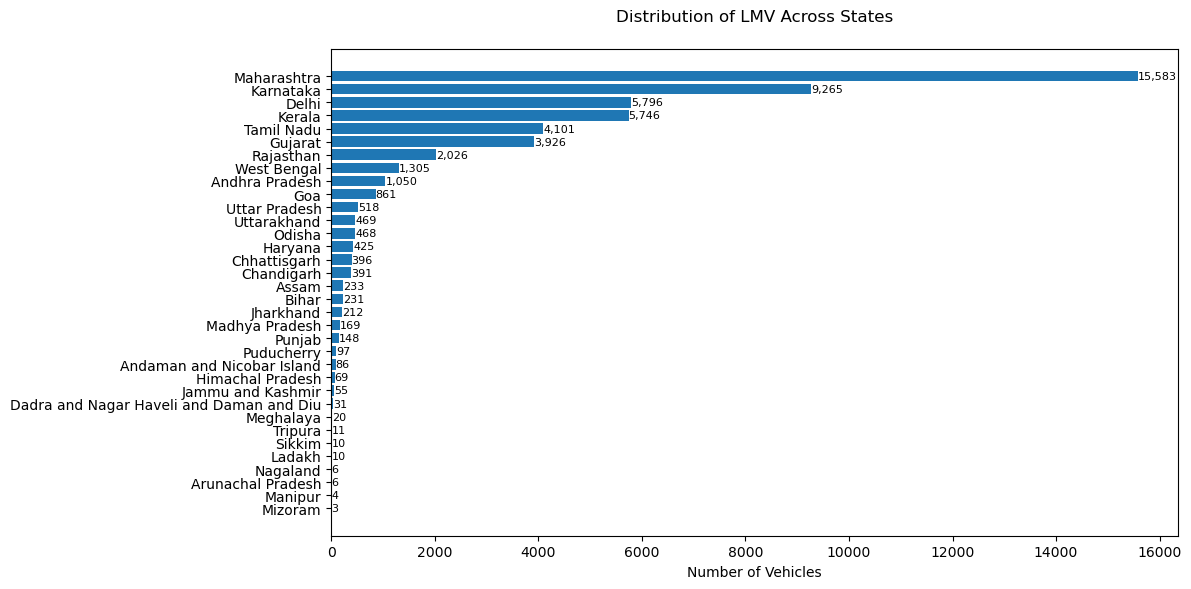


Analyzing LPV:
--------------------------------------------------
Number of states with LPV: 31
Maximum value: 3,415 (Delhi)
Minimum value: 1 (Arunachal Pradesh)
Average value: 258


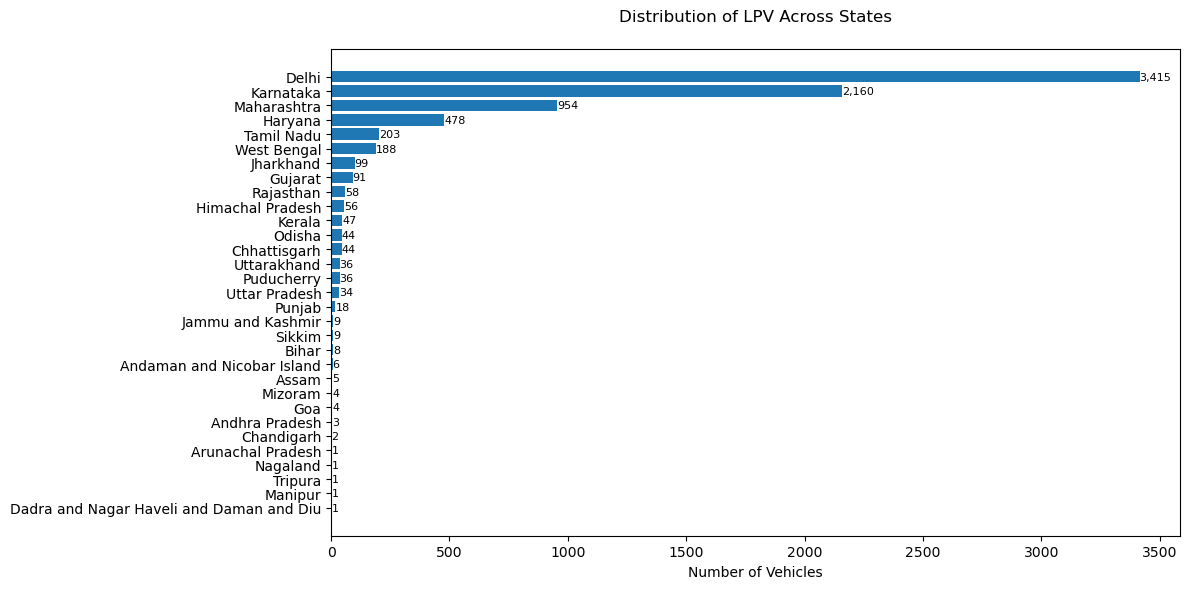


Analyzing LGV:
--------------------------------------------------
Number of states with LGV: 25
Maximum value: 1,406 (Tamil Nadu)
Minimum value: 1 (Uttarakhand)
Average value: 133


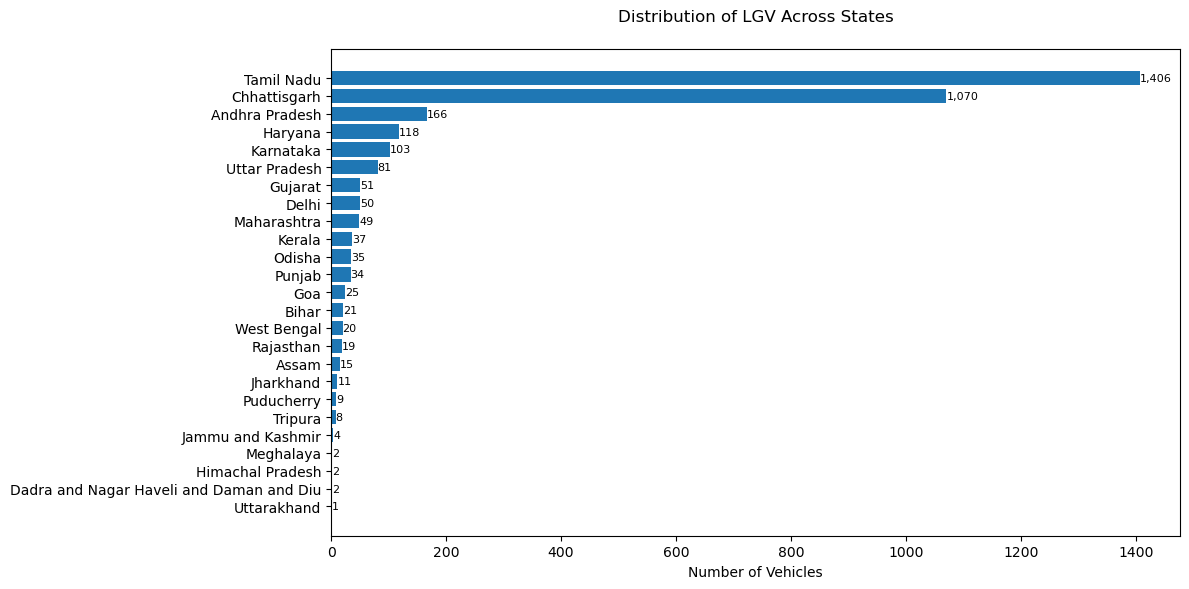


Analyzing 4WIC:
--------------------------------------------------
Number of states with 4WIC: 7
Maximum value: 6 (Gujarat)
Minimum value: 1 (Bihar)
Average value: 2


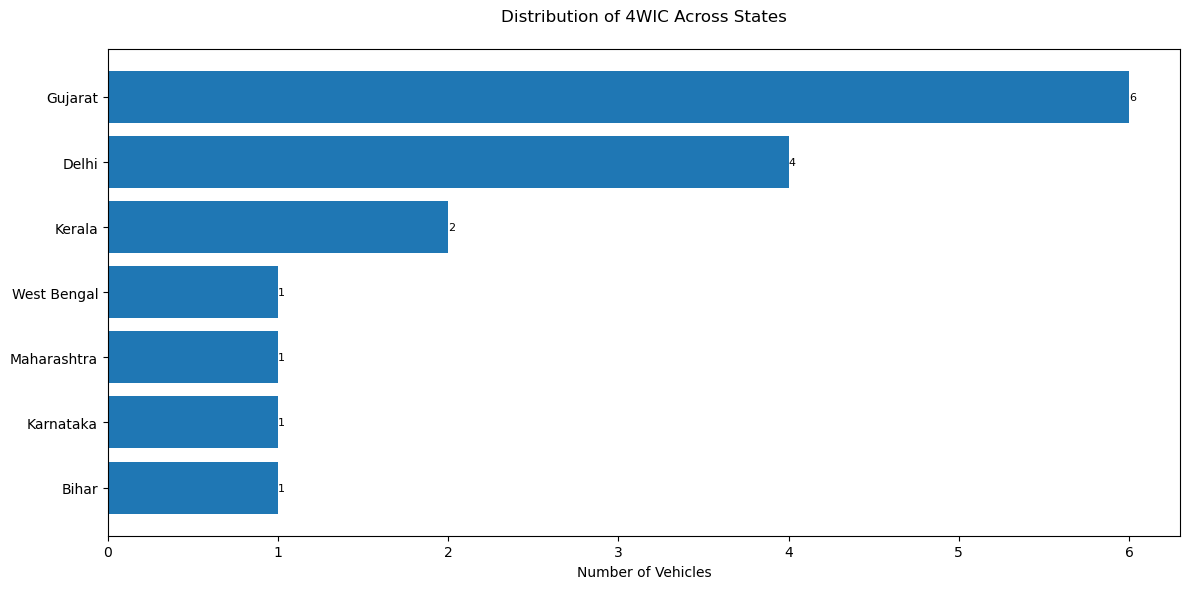


Analyzing MMV:
--------------------------------------------------
Number of states with MMV: 2
Maximum value: 4 (Maharashtra)
Minimum value: 2 (Gujarat)
Average value: 3


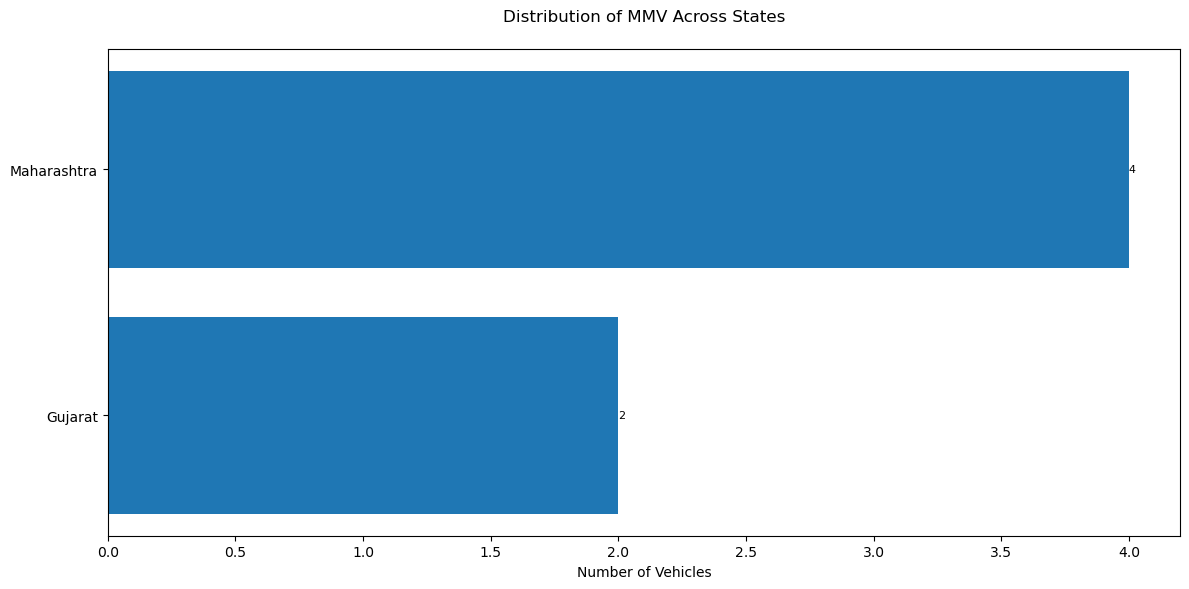


Analyzing MPV:
--------------------------------------------------
Number of states with MPV: 13
Maximum value: 242 (Maharashtra)
Minimum value: 1 (Chhattisgarh)
Average value: 32


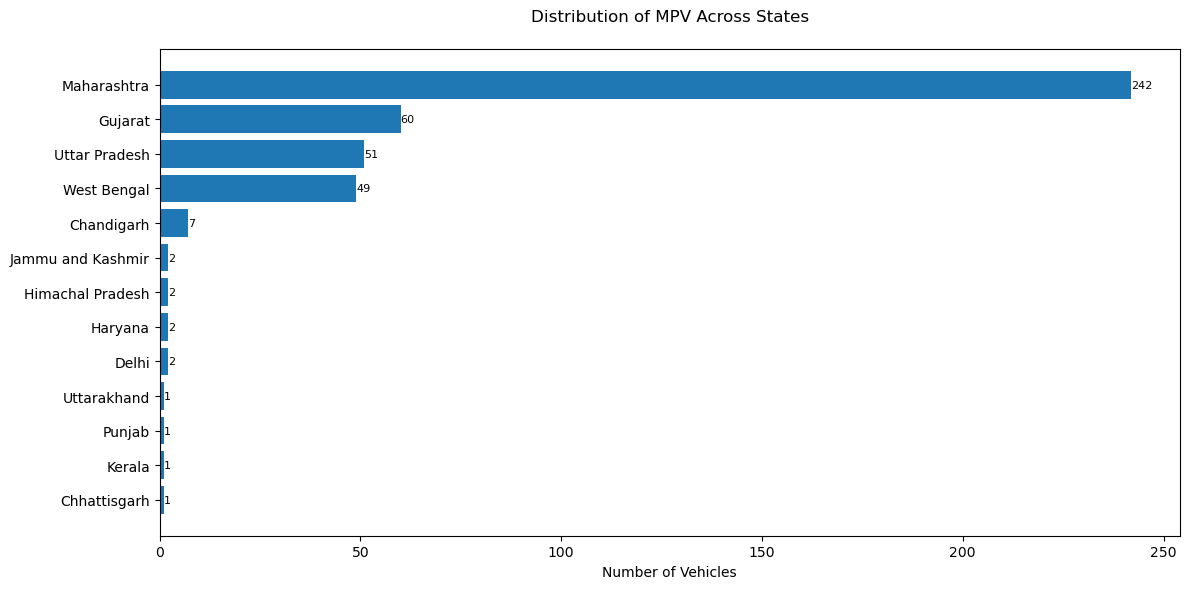


Analyzing MGV:
--------------------------------------------------
Number of states with MGV: 10
Maximum value: 6 (Gujarat)
Minimum value: 1 (Bihar)
Average value: 2


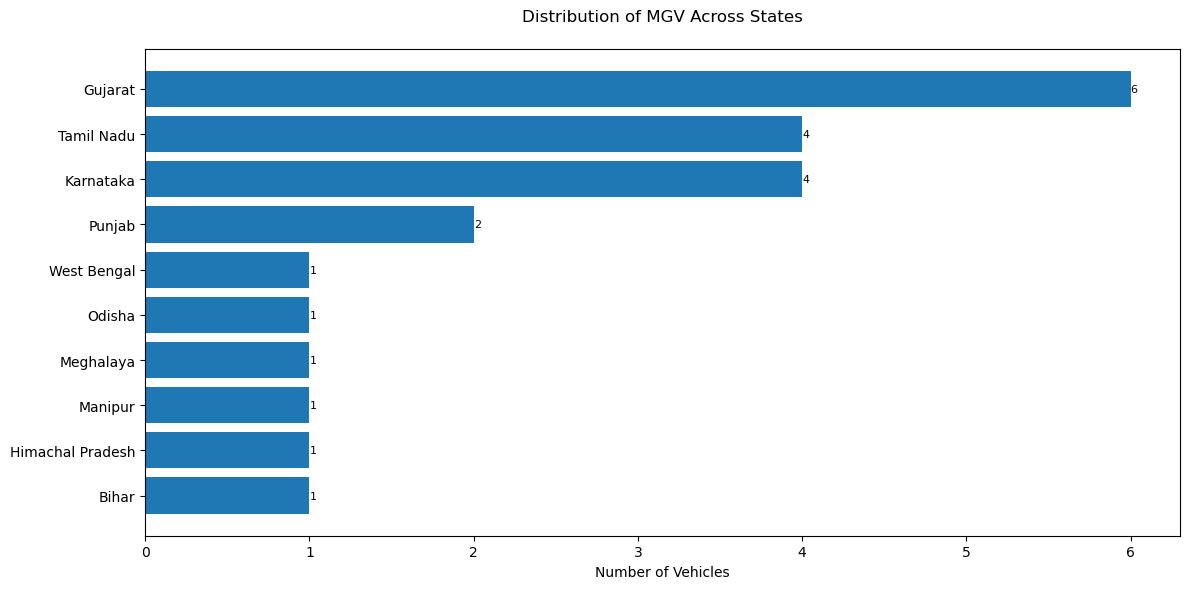


Analyzing HPV:
--------------------------------------------------
Number of states with HPV: 24
Maximum value: 890 (Maharashtra)
Minimum value: 1 (Jharkhand)
Average value: 133


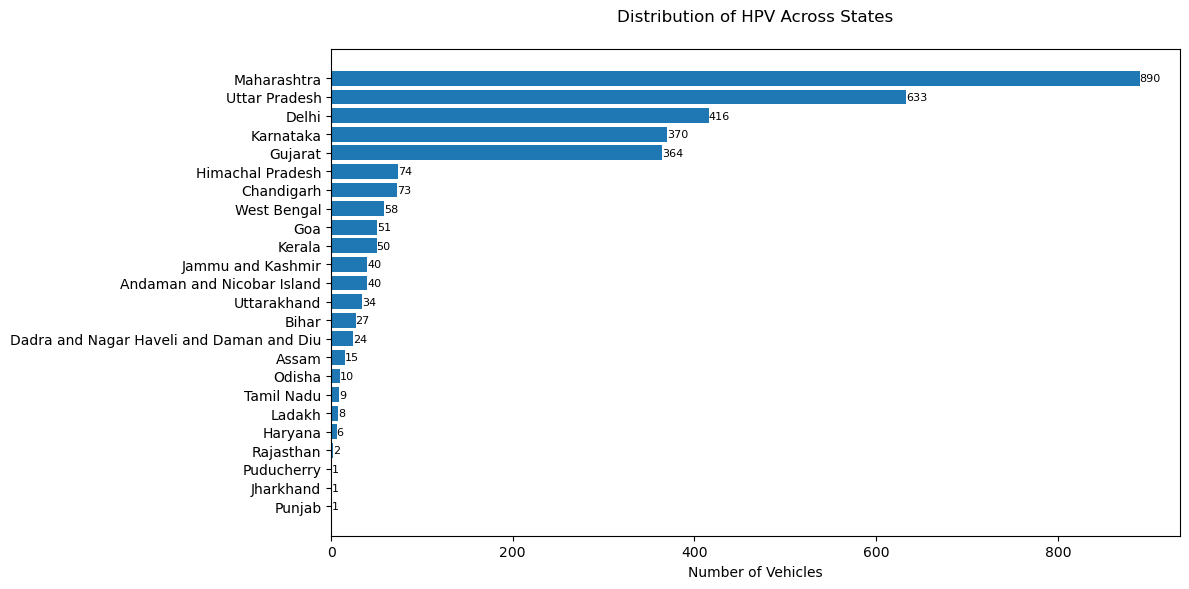


Analyzing HGV:
--------------------------------------------------
Number of states with HGV: 19
Maximum value: 15 (Tamil Nadu)
Minimum value: 1 (Goa)
Average value: 5


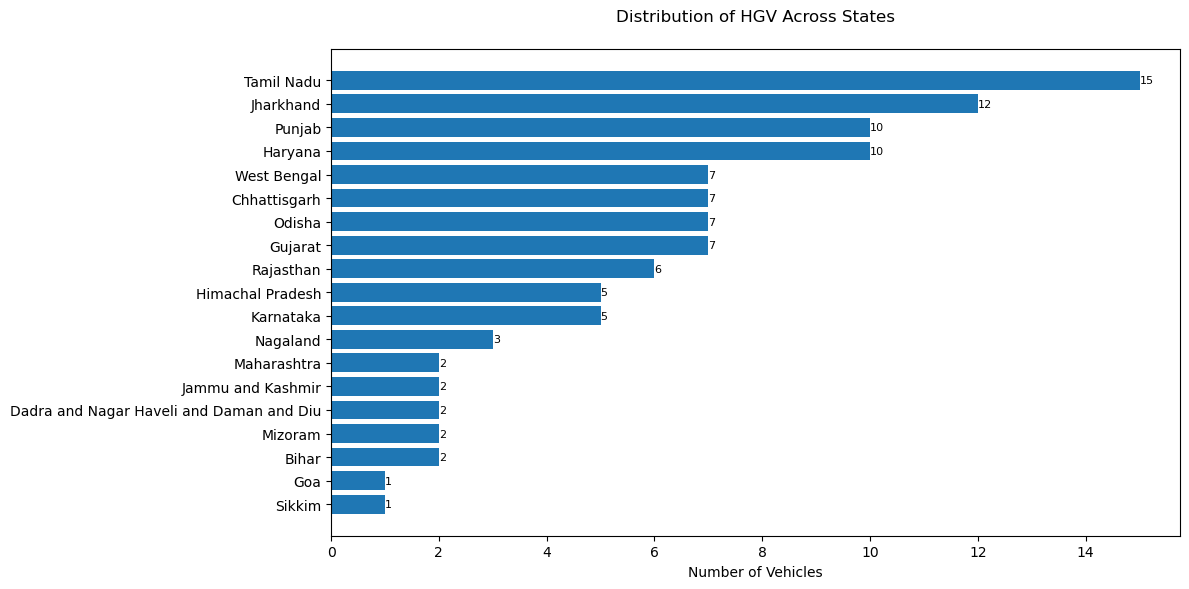


Analyzing OTH:
--------------------------------------------------
Number of states with OTH: 13
Maximum value: 1,117 (Andhra Pradesh)
Minimum value: 1 (Chandigarh)
Average value: 127


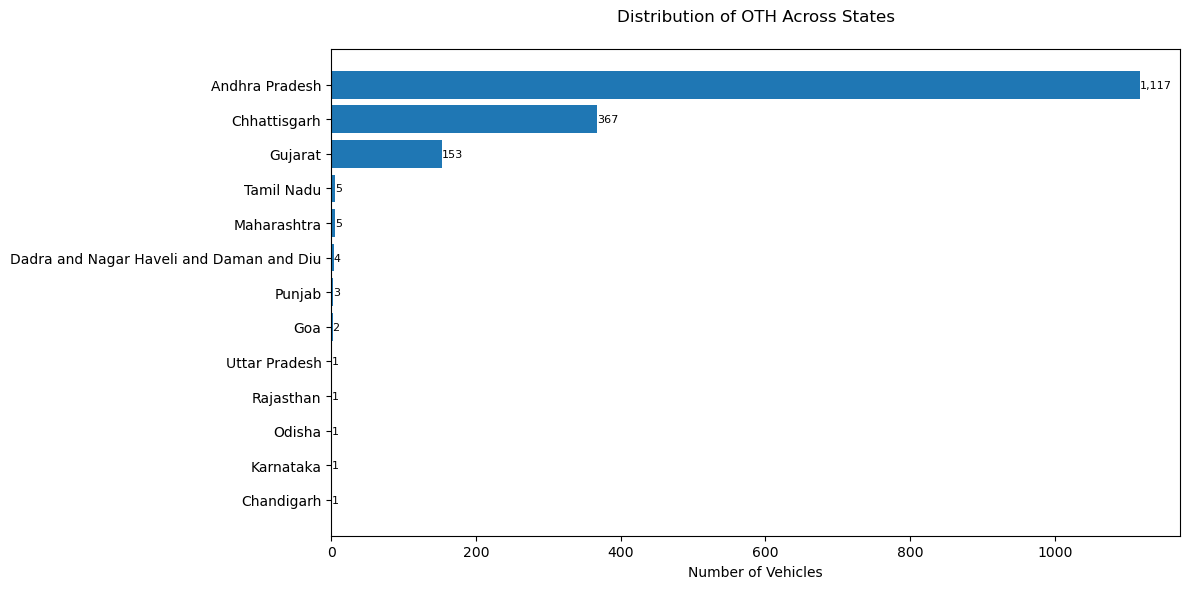


Overall Summary:
--------------------------------------------------

Top 5 States by Total Vehicles:
   State Name    Total
Uttar Pradesh 414978.0
        Delhi 183741.0
  Maharashtra 179087.0
    Karnataka 150179.0
    Rajasthan 120769.0

Percentage Distribution of Vehicle Types:
2WN: 44.58%
2WT: 0.53%
3WN: 0.04%
3WT: 50.93%
LMV: 2.98%
LPV: 0.44%
LGV: 0.19%
MPV: 0.02%
HPV: 0.18%
HGV: 0.01%
OTH: 0.09%


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV data
df = pd.read_csv('data\Statewise Vehicle Distribution.csv')

# Remove 'Grand Total' row
df = df[df['State Name'] != 'Grand Total']

# Define the vehicle categories
categories = ['2WN', '2WT', '2WIC', '3WN', '3WT', 'LMV', 'LPV', 'LGV', 
             '4WIC', 'MMV', 'MPV', 'MGV', 'HPV', 'HGV', 'OTH']


# Create a function to plot bar graph for each category
def plot_category(data, category):
    # Remove rows where category value is NA or 0
    data = data[pd.notna(data[category])]
    data = data[data[category] != 0]
    
    # Sort values in descending order
    data = data.sort_values(by=category, ascending=True)
    
    # Create figure
    plt.figure(figsize=(12, 6))
    
    # Create horizontal bar plot
    bars = plt.barh(data['State Name'], data[category])
    
    # Add value labels on the bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, 
                f'{int(width):,}', 
                ha='left', va='center', fontsize=8)
    
    # Customize the plot
    plt.title(f'Distribution of {category} Across States', pad=20)
    plt.xlabel('Number of Vehicles')
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Plot graphs for each category
for category in categories:
    print(f"\nAnalyzing {category}:")
    print("-" * 50)
    
    # Get non-zero, non-NA values for the category
    valid_data = df[pd.notna(df[category]) & (df[category] != 0)]
    
    if len(valid_data) > 0:
        # Print some basic statistics
        print(f"Number of states with {category}: {len(valid_data)}")
        print(f"Maximum value: {int(valid_data[category].max()):,} ({valid_data.loc[valid_data[category].idxmax(), 'State Name']})")
        print(f"Minimum value: {int(valid_data[category].min()):,} ({valid_data.loc[valid_data[category].idxmin(), 'State Name']})")
        print(f"Average value: {int(valid_data[category].mean()):,}")
        
        # Create the plot
        plot_category(df, category)
    else:
        print(f"No valid data for {category}")

# Additional summary statistics
print("\nOverall Summary:")
print("-" * 50)

# Calculate total vehicles by state
df['Total'] = df[categories].sum(axis=1)

# Display top 5 states by total vehicles
print("\nTop 5 States by Total Vehicles:")
top_5 = df.nlargest(5, 'Total')[['State Name', 'Total']]
print(top_5.to_string(index=False))

# Calculate percentage distribution of vehicle types
total_by_category = df[categories].sum()
percentage_by_category = (total_by_category / total_by_category.sum() * 100).round(2)

print("\nPercentage Distribution of Vehicle Types:")
for category, percentage in percentage_by_category.items():
    if percentage > 0:
        print(f"{category}: {percentage}%")